In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the API key.
from config import weather_api_key as api_key
import time

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

frolovo ru
illoqqortoormiut gl
bathsheba bb
rock sound bs
brigantine us
pangnirtung ca
butaritari ki
guerrero negro mx
el astillero es
chokurdakh ru


In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

10

In [12]:
# bach impose url specification from 6/Monday/07
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
#city = "London"

# Build query URL
#url = url +"q=" + city + "&appid=" +api_key
#now = requests.get(url)
#print(url)#now

In [13]:
#6.2.6
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    #if (i % 5 == 0 and i >= 10):
    if (i % 50 == 0 and i >= 50):
        time.sleep(60)
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")  +"&appid=" + api_key

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_current_description = city_weather['weather'][0]['description']
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date,
                          "Current Description": city_current_description
                          
                        })

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | frolovo
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | bathsheba
Processing Record 4 of Set 1 | rock sound
Processing Record 5 of Set 1 | brigantine
Processing Record 6 of Set 1 | pangnirtung
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | guerrero negro
Processing Record 9 of Set 1 | el astillero
Processing Record 10 of Set 1 | chokurdakh
-----------------------------
Data Retrieval Complete      
-----------------------------


In [14]:
print(len(cities))

10


In [15]:
cities


['frolovo',
 'illoqqortoormiut',
 'bathsheba',
 'rock sound',
 'brigantine',
 'pangnirtung',
 'butaritari',
 'guerrero negro',
 'el astillero',
 'chokurdakh']

In [9]:
city_data


[{'City': 'Hovd',
  'Lat': 48.0056,
  'Lng': 91.6419,
  'Max Temp': 275.77,
  'Humidity': 45,
  'Cloudiness': 97,
  'Wind Speed': 0.37,
  'Country': 'MN',
  'Date': '2021-05-21 16:39:50'},
 {'City': 'Mvangue',
  'Lat': 2.9667,
  'Lng': 11.5167,
  'Max Temp': 295.88,
  'Humidity': 96,
  'Cloudiness': 99,
  'Wind Speed': 0.9,
  'Country': 'CM',
  'Date': '2021-05-21 16:39:51'},
 {'City': 'Aksarka',
  'Lat': 66.5606,
  'Lng': 67.7975,
  'Max Temp': 294.23,
  'Humidity': 52,
  'Cloudiness': 24,
  'Wind Speed': 3.63,
  'Country': 'RU',
  'Date': '2021-05-21 16:39:51'},
 {'City': 'Nikolskoye',
  'Lat': 59.7035,
  'Lng': 30.7861,
  'Max Temp': 285.04,
  'Humidity': 89,
  'Cloudiness': 97,
  'Wind Speed': 4.56,
  'Country': 'RU',
  'Date': '2021-05-21 16:39:52'},
 {'City': 'Sisimiut',
  'Lat': 66.9395,
  'Lng': -53.6735,
  'Max Temp': 274.85,
  'Humidity': 70,
  'Cloudiness': 100,
  'Wind Speed': 11.68,
  'Country': 'GL',
  'Date': '2021-05-21 16:39:53'},
 {'City': 'Vaini',
  'Lat': -21.2,
  '

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hovd,48.0056,91.6419,275.77,45,97,0.37,MN,2021-05-21 16:39:50
1,Mvangue,2.9667,11.5167,295.88,96,99,0.90,CM,2021-05-21 16:39:51
2,Aksarka,66.5606,67.7975,294.23,52,24,3.63,RU,2021-05-21 16:39:51
3,Nikolskoye,59.7035,30.7861,285.04,89,97,4.56,RU,2021-05-21 16:39:52
4,Sisimiut,66.9395,-53.6735,274.85,70,100,11.68,GL,2021-05-21 16:39:53
5,Vaini,-21.2000,-175.2000,299.24,89,75,6.17,TO,2021-05-21 16:39:53
6,Torbay,47.6666,-52.7314,293.98,45,40,10.80,CA,2021-05-21 16:39:54
7,Bria,6.5423,21.9863,297.20,71,79,0.64,CF,2021-05-21 16:39:54
8,Hithadhoo,-0.6000,73.0833,302.06,71,25,2.36,MV,2021-05-21 16:39:55
9,Fortuna,40.5982,-124.1573,286.75,64,1,3.13,US,2021-05-21 16:37:13


In [12]:
new_column_order = ["City", "Country","Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order] 
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hovd,MN,2021-05-21 16:39:50,48.0056,91.6419,275.77,45,97,0.37
1,Mvangue,CM,2021-05-21 16:39:51,2.9667,11.5167,295.88,96,99,0.90
2,Aksarka,RU,2021-05-21 16:39:51,66.5606,67.7975,294.23,52,24,3.63
3,Nikolskoye,RU,2021-05-21 16:39:52,59.7035,30.7861,285.04,89,97,4.56
4,Sisimiut,GL,2021-05-21 16:39:53,66.9395,-53.6735,274.85,70,100,11.68
...,...,...,...,...,...,...,...,...,...
551,Yumen,CN,2021-05-21 16:55:57,40.2833,97.2000,286.02,50,100,3.94
552,Aasiaat,GL,2021-05-21 16:55:58,68.7098,-52.8699,273.69,76,100,6.21
553,Likasi,CD,2021-05-21 16:55:08,-10.9814,26.7333,290.14,59,10,0.76
554,Rocha,UY,2021-05-21 16:56:59,-34.4833,-54.3333,290.47,72,100,7.36


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

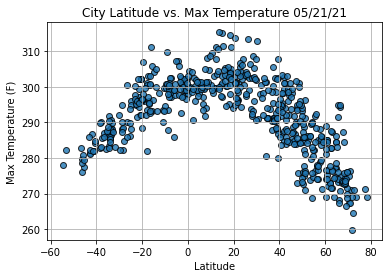

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

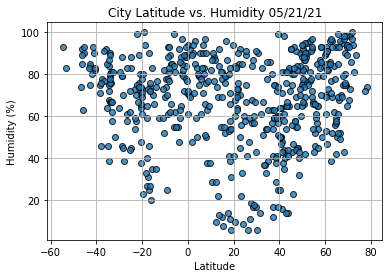

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

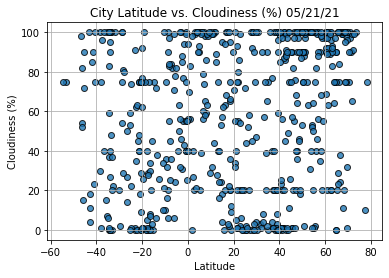

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

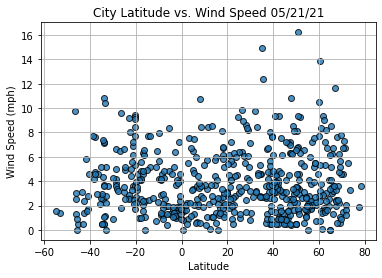

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [25]:
#6.4.2
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
index13 = city_data_df.loc[13]
index13

City                       Albany
Country                        US
Date          2021-05-21 16:35:43
Lat                       42.6001
Lng                      -73.9662
Max Temp                   301.12
Humidity                       43
Cloudiness                     86
Wind Speed                   0.89
Name: 13, dtype: object

In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

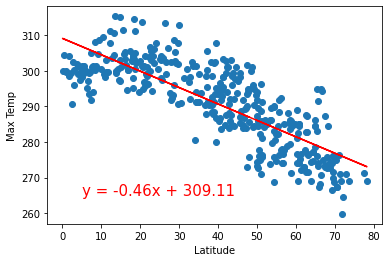

In [30]:
#6.4.2
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(5,265))

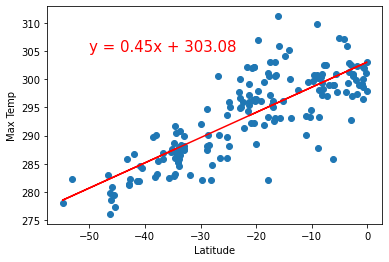

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,305))

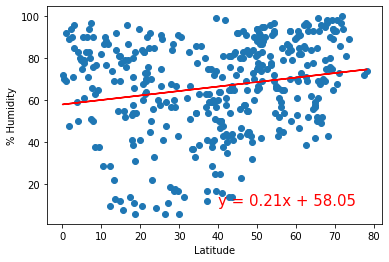

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

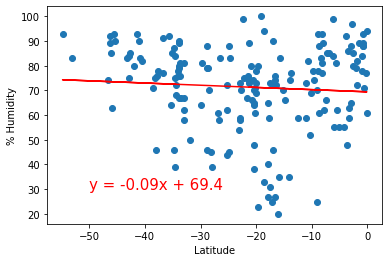

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,30))

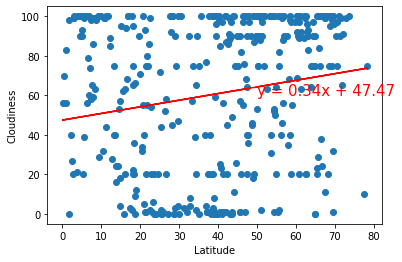

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(50,60))

In [40]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hovd,MN,2021-05-21 16:39:50,48.0056,91.6419,275.77,45,97,0.37
1,Mvangue,CM,2021-05-21 16:39:51,2.9667,11.5167,295.88,96,99,0.90
2,Aksarka,RU,2021-05-21 16:39:51,66.5606,67.7975,294.23,52,24,3.63
3,Nikolskoye,RU,2021-05-21 16:39:52,59.7035,30.7861,285.04,89,97,4.56
4,Sisimiut,GL,2021-05-21 16:39:53,66.9395,-53.6735,274.85,70,100,11.68


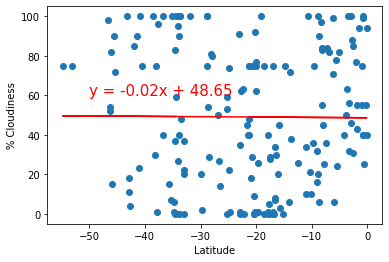

In [44]:
#6.4.4
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

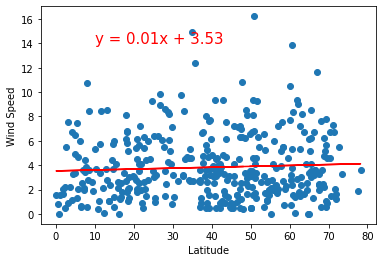

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,14))

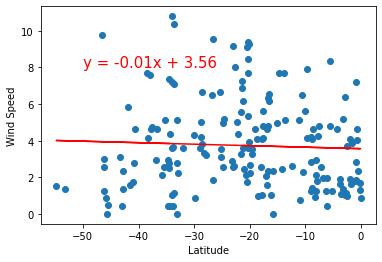

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,8))